# **Лабораторная работа №0**

# **Студент: Смалий А. В.**

# **Группа: М8О-308Б**

## **Постановка задачи:**

Требуется сформировать/получить два набора данных соответствующие следующим критериям:

1.   Один из датасетов должен представлять собой корпус документов. Язык, источник и тематика произвольна
2.   Второй датасет должен содержать категориальные, количественные признаки. Для данного датасета определить предсказываемые признаки (для задачи регрессии и классфикации). Если такого признака нет, спроектировать

Данные датасеты будут в дальнейшем использованы в оставшихся лабораторных работах. По каждому датасету построить распределения признаков (в случае корпуса документов – построить распределение слов) и объяснить имеющуюся картину. Вычислить статистические характеристики признаков. Обнаружить и решить возможные проблемы с данными. Если решить данную проблему невозможно, объяснить почему.


## **Использованные библиотеки:**

In [0]:
import numpy as np
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt

## **Задание 1. Работа с датасетом с категориальными и количественными признаками**

Загружаемый датасет - [база данных игроков компьютерной игры fifa 19](https://www.kaggle.com/karangadiya/fifa19)

In [4]:
data = pd.read_csv('fifa19_data.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Предсказываемые признаки:


*   Цена футболиста в зависимости от его харктеристик
*   Национальность футболиста в зависимости от его характеристик

Для задачи классификации:


*   Можно определить, на какой позиции играет футболист в зависимости от его характеристик
*   Подходит ли футболист к какой-то другой позиции исходя из его характеристик





**Названия столбцов, их типы и краткая информация:**

In [5]:
print(data.columns)

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

**Количество данных для каждого параметра, медиана, стандартное отклонение, минимум, кватили (0.25, 0.5, 0.75), максимум**

In [7]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


**Средние характеристики для футболистов из Германии:**

In [8]:
data[data['Nationality'] == 'Germany'].mean()

Unnamed: 0                    9392.902337
ID                          217681.117696
Age                             24.338063
Overall                         66.086811
Potential                       71.699499
Special                       1566.782972
International Reputation         1.138912
Weak Foot                        3.133891
Skill Moves                      2.279498
Jersey Number                   19.224268
Weight                         172.317155
Crossing                        48.337238
Finishing                       42.961506
HeadingAccuracy                 50.697908
ShortPassing                    57.651046
Volleys                         41.038494
Dribbling                       53.167364
Curve                           45.133054
FKAccuracy                      40.471967
LongPassing                     50.302929
BallControl                     56.675314
Acceleration                    63.287029
SprintSpeed                     63.690377
Agility                         62

**Значение, которое цена не превысит с вероятностью 0.5 (персентиль)**

In [9]:
np.percentile(data['Overall'], 50)

66.0

**Построение графиков:**

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

**Диаграмма зависимости скорости бега игрока от его веса**

In [11]:
sns.regplot(x='Weight', y='SprintSpeed', data=data)

Из графика можно увидеть, что скорость игрока зависит от его веса. То есть чем больше весит игрок, тем медленнее он бегает.

**Гистограмма зависимости рейтинга футболиста в зависимости от "рабочей" ноги:**


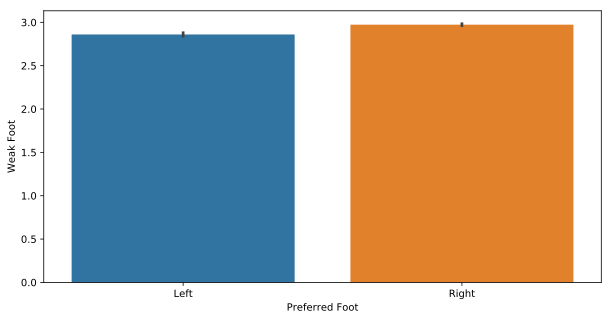

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
sns.barplot(data = data, x = 'Preferred Foot', y = 'Weak Foot')

Из этой гистограммы мы можем заметить, что футболисты с "рабочей" правой ногой играют лучше "слабой" ногой, в отличии от своих оппонентов с "рабочей" левой ногой.

## **Задание 2. Работа с корпусом текстовых документов**

Выбранный [корпус](https://www.kaggle.com/ishnoor/poetry-analysis-with-machine-learning) документов - поэмы на английском языке. Он состоит из 572-ух поэм.

**Нахождение наиболее часто встречающихся слов в поэмах на английском языке:**

In [49]:
import nltk
import os
from collections import Counter

directory = './'
files = os.listdir(directory)
files.remove('fifa19_data.csv')
files.remove('.config')
files.remove('sample_data')

text = ''
for file in files:
    poem = open(directory+file, 'r')
    for line in poem:
        text += line

tokens = nltk.word_tokenize(text)
c = Counter(tokens)

most = dict(c.most_common(30))

for i in ',.;:?':
    most.pop(i)
    
most

{'And': 1482,
 'I': 1417,
 'The': 713,
 'a': 1197,
 'all': 587,
 'and': 2079,
 'as': 483,
 'be': 547,
 'by': 510,
 'for': 462,
 'her': 781,
 'his': 576,
 'in': 1339,
 'is': 784,
 'it': 501,
 'love': 548,
 'me': 642,
 'my': 960,
 'not': 625,
 'of': 1949,
 'that': 1010,
 'the': 3595,
 'to': 1643,
 'with': 794,
 'you': 505}

**Построение гистограммы распределения наиболее часто встречающихся слов:**

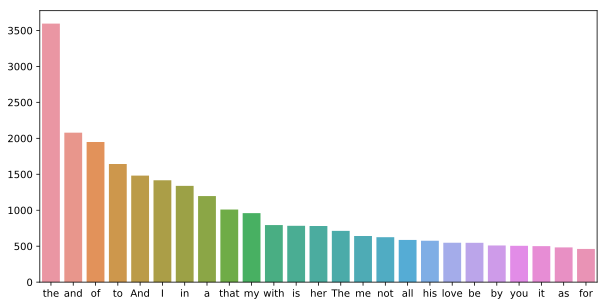

In [53]:
poems_data = {'x':[], 'y':[]}

for label, coord in most.items():
    poems_data['x'].append(label)
    poems_data['y'].append(coord)
sns.barplot(x = poems_data['x'], y = poems_data['y'])

Не удивительно, что на гистограмме выше мы отчетливо видим преобладание местоимений и артиклей над другими частями речи. Однако можно заметить преобладане слов "her", "his", "love" из чего можно сделать вывод о том, что большинство поем были адресованы кому-то и имели подтекст признания в любви.

## **Вывод:**

Используя простые графики и команды из библиотек языка Python можно выявить общие тенденции и тривиальные зависимости. Однако, для более значимой и полезной информации следует прибегнуть к более сложным алгоритмам и методам машинного обучения.

Во время выполнения данной лабораторной работы у меня возникли трудности с нахождением нормального набора данных (конечный вариант оказался также не идеален) и с установкой программного обеспечения (а именно Anaconda и Jupyter Notebook, в итоге пользовался Google Colab). В результате большая часть потраченного мной времени на лабораторную работу является, к сожалению, не продуктивной.